In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import mpslib as mps

In [6]:
ti, ti_name = mps.trainingimages.strebelle(di=3, coarse3d=1)
print('TI shape:', ti.shape)

nsim = 3
dims = [nsim, 128, 128, 16]
nmultigrid = 5
ncond = 25

snesim=mps.mpslib(method='mps_snesim_tree')
snesim.ti=ti
snesim.par['n_real']=nsim
snesim.par['n_multiple_grids']=nmultigrid
snesim.par['n_cond']=ncond
snesim.par['rseed']=123
snesim.par['simulation_grid_size'][0]=dims[1]
snesim.par['simulation_grid_size'][1]=dims[2]
snesim.par['simulation_grid_size'][2]=dims[3]
snesim.parameter_filename = 'snesim.par'
snesim.mps_snesim_par_write()
snesim.run()

# Save realizations from SNESIM
realizations = np.zeros(dims)
for i in range(nsim):
    realizations[i] = snesim.sim[i]
print('Realizations shape:', realizations.shape)

Beginning download of https://github.com/GAIA-UNIL/trainingimages/raw/master/MPS_book_data/Part2/ti_strebelle.sgems to ti_strebelle.dat
TI shape: (83, 83, 9)
Using mps_snesim_tree installed in c:\Users\Misael Morales\AppData\Local\Programs\Python\Python39\lib\site-packages\mpslib\bin (scikit-mps in c:\Users\Misael Morales\AppData\Local\Programs\Python\Python39\lib\site-packages\mpslib\mpslib.py)
Realizations shape: (3, 128, 128, 16)


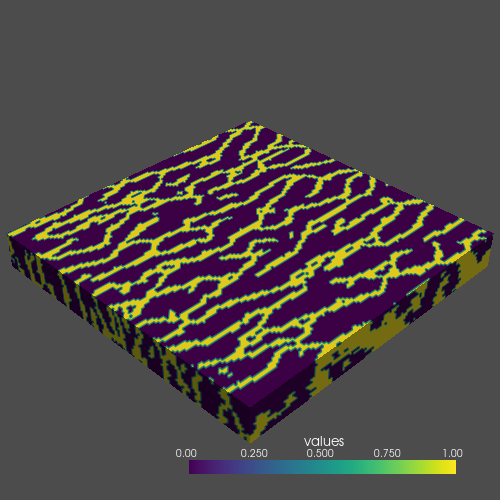

In [7]:
pl = pv.Plotter()
pl.add_mesh(realizations[0])
pl.show(title='SNESIM', window_size=(500,500), jupyter_backend='static')

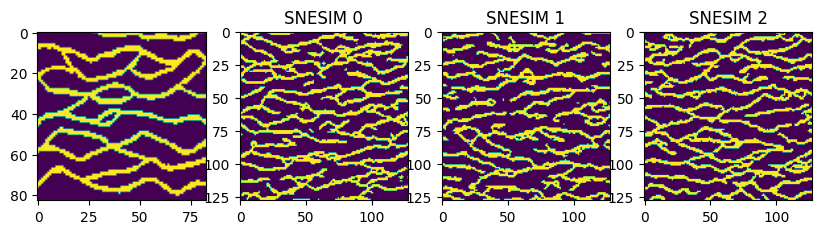

In [8]:
fig, ax = plt.subplots(1, nsim+1, figsize=(10,3))
ax[0].imshow(ti[:,:,-1].T)
for i in range(nsim):
    ax[i+1].imshow(realizations[i,:,:,-1].T)
    ax[i+1].set(title='SNESIM {}'.format(i))